# 2015-2016 Spring

In [1]:
>>> import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # a visualization library from matplotlib
from math import sin, cos, sqrt, atan2, radians
import json
import pprint
import ast

In [2]:
Course_df = pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/2015-2016-spring-course.xlsx") #course list
TA_df =pd.read_excel(r"/Users/artun/Desktop/ens491:burak_kocuk/2015-2016-fall-TA.xlsx") # TA preference list

In [3]:
n_rows, n_columns = Course_df.shape  # get the shape of dataframe
print("Shape of course dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))


Shape of course dataframe is
number of rows: 109, number of columns: 9


In [4]:
n_rows, n_columns = TA_df.shape  # get the shape of dataframe
print("Shape of TA dataframe is")
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

Shape of TA dataframe is
number of rows: 292, number of columns: 11


In [5]:
print("299 TA's assigned to FENS courses during fall semester of 2014/2015")

299 TA's assigned to FENS courses during fall semester of 2014/2015


In [6]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,Abba Ibrahim \nRamadan,MS,MATH,20,20,1- MATH 101 (380 / 350)\n2- MATH 102 (130 / 17...,MATH 203,10401.0,NaN,NaN
1,18282,Abdolali \nKhalili Sadaghiani,PHD,ME,20,20,NaN,MATH 101,10536.0,NaN,NaN
2,17061,Abdülkadir \nCanatar,MS,PHYS,20,20,NaN,NS 101,10616.0,NaN,NaN
3,19996,Abdullahi \nAdamu,MS,EE,10,10,1- ENS 211 (60 / 75)\n2- MATH 203 (130 / 113)\...,ENS 211,10317.0,NaN,NaN
4,14277,Abdurrahman \nBurak,MS,EE,10,10,1- EE 303 (30 / 15)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10923.0,NaN,NaN


In [7]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
0,NaN,NaN,NaN,NaN,Grad Program,NaN,NaN,NaN,NaN
1,20229.0,BIO 301,0,Intro. to Molecular Biology,NaN,20.0,15.0,1-Hande Suer ( 64344 ) (10 / 10)\n1-Yunus Akko...,"Yunus Akkoc (64736, BIO, 10 hours)\nNur Mehpar..."
2,20227.0,BIO 303,0,Genetics,NaN,30.0,15.0,1-Secil Erbil ( 64723 ) (10 / 10)\n1-Cevriye P...,"Asma Abdullah Abdulwahab Al-Murtadha (64553, B..."
3,21125.0,BIO 304,0,Biological Func.&Structure,NaN,0.0,5.0,2-Haleh Abdizadeh ( 64281 ) (10 / 10)\n3-Nazif...,None
4,21147.0,BIO 310,0,Introduction to Bioinformatics,NaN,20.0,10.0,1-Asli Yenenler ( 64329 ) (20 / 20)\n3-Mertkay...,"Asli Yenenler (64329, BIO, 20 hours)"


In [8]:
TA_df.dtypes

Student ID             int64
Name                  object
Degree                object
Program               object
Hours Assigned         int64
Hours Requested        int64
Requested Courses     object
Assigned Course 1     object
CRN 1                float64
Assigned Course 2     object
CRN 2                float64
dtype: object

In [9]:
Course_df.dtypes

CRN                          float64
Name                          object
Section                       object
Title                         object
Preferred                     object
Hours Assigned               float64
Hours Requested              float64
Requesting Teaching Grads     object
Assigned Teaching Grads       object
dtype: object

## Handling Dirty Data

In [10]:
# TA dataframe first
TA_df = TA_df.fillna(0) # NaN values are cumbersome values. Change all to 0

In [11]:
TA_df['CRN 1'] = TA_df['CRN 1'].astype('int64') # CRN values are actually integer values. However , they are float in the file
# Change the CRN 1 column value type to int as expected

In [12]:
TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')
#Change the CRN 2 column value type to int as expecte

In [13]:
TA_df['Name'] = TA_df['Name'].replace('\n',' ', inplace=True)

In [14]:
TA_df['Assigned Course 2'] = TA_df['Assigned Course 2'].replace('\n',' ', inplace=True)

In [15]:
TA_df.head()

,Student ID,Name,Degree,Program,Hours Assigned,Hours Requested,Requested Courses,Assigned Course 1,CRN 1,Assigned Course 2,CRN 2
0,19928,None,MS,MATH,20,20,1- MATH 101 (380 / 350)\n2- MATH 102 (130 / 17...,MATH 203,10401,None,0
1,18282,None,PHD,ME,20,20,0,MATH 101,10536,None,0
2,17061,None,MS,PHYS,20,20,0,NS 101,10616,None,0
3,19996,None,MS,EE,10,10,1- ENS 211 (60 / 75)\n2- MATH 203 (130 / 113)\...,ENS 211,10317,None,0
4,14277,None,MS,EE,10,10,1- EE 303 (30 / 15)\n2- EE 480 (0 / 5)\n3- ENS...,EE 303,10923,None,0


In [16]:
# Course dataframes turn
Course_df = Course_df.fillna(0) # replace all NaN values with 0

In [17]:
Course_df = Course_df.drop(Course_df.index[0])

In [18]:
Course_df['CRN'] = Course_df['CRN'].astype('int64')

In [19]:
Course_df['Hours Assigned'] = Course_df['Hours Assigned'].astype('int64')

In [20]:
Course_df['Hours Requested'] = Course_df['Hours Requested'].astype('int64')

In [21]:
Course_df.head()

,CRN,Name,Section,Title,Preferred,Hours Assigned,Hours Requested,Requesting Teaching Grads,Assigned Teaching Grads
1,20229,BIO 301,0,Intro. to Molecular Biology,0,20,15,1-Hande Suer ( 64344 ) (10 / 10)\n1-Yunus Akko...,"Yunus Akkoc (64736, BIO, 10 hours)\nNur Mehpar..."
2,20227,BIO 303,0,Genetics,0,30,15,1-Secil Erbil ( 64723 ) (10 / 10)\n1-Cevriye P...,"Asma Abdullah Abdulwahab Al-Murtadha (64553, B..."
3,21125,BIO 304,0,Biological Func.&Structure,0,0,5,2-Haleh Abdizadeh ( 64281 ) (10 / 10)\n3-Nazif...,None
4,21147,BIO 310,0,Introduction to Bioinformatics,0,20,10,1-Asli Yenenler ( 64329 ) (20 / 20)\n3-Mertkay...,"Asli Yenenler (64329, BIO, 20 hours)"
5,21144,BIO 322,0,Biochemistry II,0,10,5,2-Cevriye Pamukcu ( 64665 ) (10 / 10)\n2-Yunus...,"Bahriye Karakas (64462, BIO, 10 hours)"


## How many TA's requested for each course ?

In [22]:

for courses in range(1,109) :
    data = Course_df.at[courses,'Requesting Teaching Grads'].splitlines() 
    print(Course_df.at[courses,'Name'] , "requested" ,len(data),"TA's")

BIO 301 requested 7 TA's
BIO 303 requested 6 TA's
BIO 304 requested 3 TA's
BIO 310 requested 2 TA's
BIO 322 requested 3 TA's
BIO 330 requested 3 TA's
BIO 335 requested 2 TA's
BIO 415 requested 2 TA's
BIO 467 requested 6 TA's
BIO 480 requested 4 TA's
CHEM 202 requested 3 TA's
CHEM 302 requested 7 TA's
CS 201 requested 26 TA's
CS 204 requested 18 TA's
CS 301 requested 10 TA's
CS 305 requested 2 TA's
CS 306 requested 8 TA's
CS 308 requested 5 TA's
CS 310 requested 6 TA's
CS 401 requested 2 TA's
CS 403 requested 1 TA's
CS 406 requested 5 TA's
CS 407 requested 1 TA's
CS 409 requested 5 TA's
CS 450 requested 6 TA's
EE 202 requested 7 TA's
EE 302 requested 6 TA's
EE 306 requested 3 TA's
EE 308 requested 5 TA's
EE 310 requested 5 TA's
EE 312 requested 4 TA's
EE 314 requested 1 TA's
EE 404 requested 2 TA's
EE 406 requested 3 TA's
EE 410 requested 3 TA's
ELAE 1 requested 3 TA's
ENS 201 requested 5 TA's
ENS 204 requested 9 TA's
ENS 205 requested 28 TA's
ENS 206 requested 3 TA's
ENS 208 requested 

In [32]:
for TA in range(1,109) :
    if Course_df.at[TA,'Assigned Teaching Grads'] != "None" :
        data = Course_df.at[TA,'Assigned Teaching Grads'].splitlines()
        print(Course_df.at[TA,'Name'] , "assigned" ,len(data),"TA's")
    else :
        print(Course_df.at[TA,'Name'] , "assigned" , 0,"TA's")

BIO 301 assigned 2 TA's
BIO 303 assigned 3 TA's
BIO 304 assigned 0 TA's
BIO 310 assigned 1 TA's
BIO 322 assigned 1 TA's
BIO 330 assigned 1 TA's
BIO 335 assigned 3 TA's
BIO 415 assigned 1 TA's
BIO 467 assigned 0 TA's
BIO 480 assigned 0 TA's
CHEM 202 assigned 2 TA's
CHEM 302 assigned 2 TA's
CS 201 assigned 14 TA's
CS 204 assigned 6 TA's
CS 301 assigned 1 TA's
CS 305 assigned 1 TA's
CS 306 assigned 1 TA's
CS 308 assigned 2 TA's
CS 310 assigned 1 TA's
CS 401 assigned 2 TA's
CS 403 assigned 1 TA's
CS 406 assigned 1 TA's
CS 407 assigned 1 TA's
CS 409 assigned 2 TA's
CS 450 assigned 1 TA's
EE 202 assigned 4 TA's
EE 302 assigned 1 TA's
EE 306 assigned 1 TA's
EE 308 assigned 1 TA's
EE 310 assigned 1 TA's
EE 312 assigned 1 TA's
EE 314 assigned 1 TA's
EE 404 assigned 1 TA's
EE 406 assigned 1 TA's
EE 410 assigned 0 TA's
ELAE 1 assigned 0 TA's
ENS 201 assigned 2 TA's
ENS 204 assigned 8 TA's
ENS 205 assigned 13 TA's
ENS 206 assigned 7 TA's
ENS 208 assigned 5 TA's
ENS 209 assigned 6 TA's
ENS 222 assi

In [24]:
top_programs = TA_df['Program'].value_counts()
print(top_programs)

MAT     63
IE      50
ME      45
CS      35
EE      35
BIO     32
MATH    19
PHYS    13
Name: Program, dtype: int64


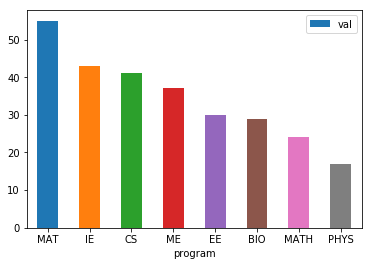

In [25]:
df = pd.DataFrame({'program':['MAT', 'IE', 'CS','ME','EE','BIO','MATH','PHYS'], 'val':[55, 43, 41,37,30,29,24,17]})
ax = df.plot.bar(x='program', y='val', rot=0)

plt.show()


## TA-Course Matrix

In [26]:
matrix_df = pd.DataFrame(index=range(8),columns=range(109))
matrix_df = matrix_df.fillna(0)
#TA_df['CRN 2'] = TA_df['CRN 2'].astype('int64')

In [27]:
#now,lets try to fill it
matrix_df = matrix_df.rename(index={0:'MAT', 1: 'IE', 2 : 'CS', 3 : 'ME', 4 : 'EE', 5 : 'BIO' , 6 : 'MATH', 7 : 'PHYS'})

In [28]:
for i in range(1,99) :
    temp = Course_df.at[i,'Name']
    matrix_df=matrix_df.rename(columns = {i:temp})

In [29]:
# now fill NaN's
for i in range(8) :
    if i == 0 : # Mat
        for a in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[a,'Name']
            temp_data = Course_df.at[a,'Assigned Teaching Grads'].split()
            for b in range(len(temp_data)) :
                if temp_data[b] == "MAT," :
                    matrix_df.at['MAT',temp_course] = matrix_df.at['MAT',temp_course] + 1
                    
    elif i == 1 : # IE
        for c in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[c,'Name']
            temp_data = Course_df.at[c,'Assigned Teaching Grads'].split()
            for d in range(len(temp_data)) :
                if temp_data[d] == "IE," :
                    matrix_df.at['IE',temp_course] = matrix_df.at['IE',temp_course] + 1
                    
    elif i == 2 : # CS
        for e in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[e,'Name']
            temp_data = Course_df.at[e,'Assigned Teaching Grads'].split()
            for f in range(len(temp_data)) :
                if temp_data[f] == "CS," :
                    matrix_df.at['CS',temp_course] = matrix_df.at['CS',temp_course] + 1
                    
    elif i == 3 : # ME
        for g in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[g,'Name']
            temp_data = Course_df.at[g,'Assigned Teaching Grads'].split()
            for h in range(len(temp_data)) :
                if temp_data[h] == "ME," :
                    matrix_df.at['ME',temp_course] = matrix_df.at['ME',temp_course] + 1
                    
    elif i == 4 : # EE
        for j in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[j,'Name']
            temp_data = Course_df.at[j,'Assigned Teaching Grads'].split()
            for k in range(len(temp_data)) :
                if temp_data[k] == "EE," :
                    matrix_df.at['EE',temp_course] = matrix_df.at['EE',temp_course] + 1
                            
    elif i == 5 : # BIO
        for l in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[l,'Name']
            temp_data = Course_df.at[l,'Assigned Teaching Grads'].split()
            for m in range(len(temp_data)) :
                if temp_data[m] == "BIO," :
                    matrix_df.at['BIO',temp_course] = matrix_df.at['BIO',temp_course] + 1
                            
    elif i == 6 : # MATH
        for n in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[n,'Name']
            temp_data = Course_df.at[n,'Assigned Teaching Grads'].split()
            for o in range(len(temp_data)) :
                if temp_data[o] == "MATH," :
                    matrix_df.at['MATH',temp_course] = matrix_df.at['MATH',temp_course] + 1
                    
    elif i == 7 : # PHYS
        for p in range(1,99) : # iterate through all courses
            temp_course = Course_df.at[p,'Name']
            temp_data = Course_df.at[p,'Assigned Teaching Grads'].split()
            for r in range(len(temp_data)) :
                if temp_data[r] == "PHYS," :
                    matrix_df.at['PHYS',temp_course] = matrix_df.at['PHYS',temp_course] + 1
        
    
                        
            
            
            
            
            
        

In [30]:
matrix_df.head(8)

,0,BIO 301,BIO 303,BIO 304,BIO 310,BIO 322,BIO 330,BIO 335,BIO 415,BIO 467,...,99,100,101,102,103,104,105,106,107,108
MAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ME,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BIO,0,2,3,0,1,1,1,3,1,0,...,0,0,0,0,0,0,0,0,0,0
MATH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PHYS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
matrix_df.sum(axis =1)

MAT     57
IE      43
CS      36
ME      44
EE      31
BIO     28
MATH    17
PHYS    15
dtype: int64